## Perfect plot Time Series

In [1]:
#%load_ext nb_black
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({"figure.figsize": (10, 7), "figure.dpi": 120})

# WYKRES POKAZUJE ZMIANY SEZONOWE W KAŻDYM ROKU

MUSZĄ BYĆ MIESIĄCE I MUSZĄ BYĆ LATA

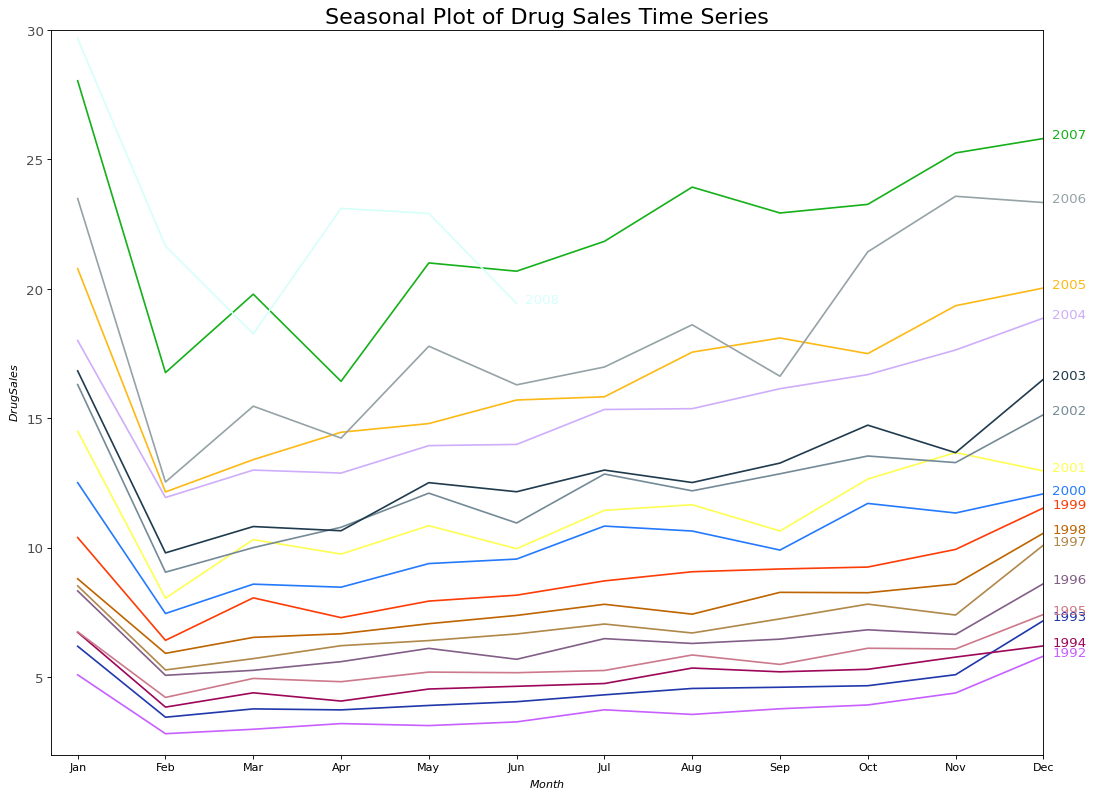

25:80: E501 line too long (86 > 79 characters)
36:80: E501 line too long (85 > 79 characters)


In [3]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.reset_index(inplace=True)

# Prepare data
df["year"] = [d.year for d in df.date]
df["month"] = [d.strftime("%b") for d in df.date]
years = df["year"].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(
    list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
)

# Draw Plot
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df.loc[df.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df.loc[df.year == y, :].shape[0] - 0.9,
            df.loc[df.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel="$Drug Sales$", xlabel="$Month$")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.dtypes

value    float64
dtype: object

In [5]:
df.shape

(204, 1)

In [6]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [7]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.reset_index(inplace=True)

In [8]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [9]:
def sesonal_plot(df):

    # Prepare data
    # df["year"] = [d.year for d in df.date]
    # df["month"] = [d.strftime("%b") for d in df.date]
    years = df["year"].unique()

    # Prep Colors
    np.random.seed(100)
    mycolors = np.random.choice(
        list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
    )

    # Draw Plot
    plt.figure(figsize=(16, 12), dpi=80)
    for i, y in enumerate(years):
        if i > 0:
            plt.plot(
                "month",
                "value",
                data=df.loc[df.year == y, :],
                color=mycolors[i],
                label=y,
            )
            plt.text(
                df.loc[df.year == y, :].shape[0] - 0.9,
                df.loc[df.year == y, "value"][-1:].values[0],
                y,
                fontsize=12,
                color=mycolors[i],
            )

    # Decoration
    plt.gca().set(
        xlim=(-0.3, 11), ylim=(2, 30), ylabel="$Drug Sales$", xlabel="$Month$"
    )
    plt.yticks(fontsize=12, alpha=0.7)
    plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
    plt.show()

# Energy.csv

In [10]:
df = pd.read_csv(
    "/home/wojciech/Perfect-Plots__GIP/Energy.csv",
    index_col=0, parse_dates=["Date"]
)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


#### zmieniam nazwę z 'Date'na 'date'

In [11]:
csv = "/home/wojciech/Perfect-Plots__GIP/Energy.csv"
df.rename(columns={"Date": "date"}, inplace=True)
df.columns

Index(['date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

#### tworzę datę

In [12]:
df['date'] = df['date']

#### tworzę kolumny 'year' i 'month'

In [13]:
df["year"] = df['date'].dt.year
df["month"] = df['date'].dt.month

#### tworzę szereg czasowy z df

In [14]:
df.reset_index
df.set_index("date", inplace=True)

# sprawdzamy jak wygląda struktura danych

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/Energy.csv")
df.head(2)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN


1:80: E501 line too long (103 > 79 characters)


# Przygotowuję dane

In [16]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/Energy.csv",
    usecols=[1, 2],
    names=['date', 'value'],
    header=0,
    parse_dates=['date']
)
df.head(3)

,date,value
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533


3:80: E501 line too long (90 > 79 characters)


#### Tworze szereg czasowy

In [17]:
df.reset_index
df.set_index('date', inplace=True)

### tworzę format daty

In [18]:
df.dtypes

value    float64
dtype: object

In [19]:
df.shape

(4383, 1)

In [20]:
df_week = df.resample('W').sum(min_count=7)
df_week.tail(5)

,value
date,
2017-12-03,10753.65420
2017-12-10,10883.77462
2017-12-17,10806.99822
2017-12-24,10082.39681
2017-12-31,8422.85648


In [21]:
df_month = df.resample('M').sum(min_count=7)
df_month.tail(5)

,value
date,
2017-08-31,40029.77368
2017-09-30,40078.56092
2017-10-31,42355.21893
2017-11-30,44339.72455
2017-12-31,44511.10431


In [22]:
df_month

,value
date,
2006-01-31,45304.70400
2006-02-28,41078.99300
2006-03-31,43978.12400
2006-04-30,38251.76700
2006-05-31,38858.14300
...,...
2017-08-31,40029.77368
2017-09-30,40078.56092
2017-10-31,42355.21893


In [23]:
df_month.reset_index(inplace=True)

In [24]:
df_month

,date,value
0,2006-01-31,45304.70400
1,2006-02-28,41078.99300
2,2006-03-31,43978.12400
3,2006-04-30,38251.76700
4,2006-05-31,38858.14300
...,...,...
139,2017-08-31,40029.77368
140,2017-09-30,40078.56092
141,2017-10-31,42355.21893
142,2017-11-30,44339.72455


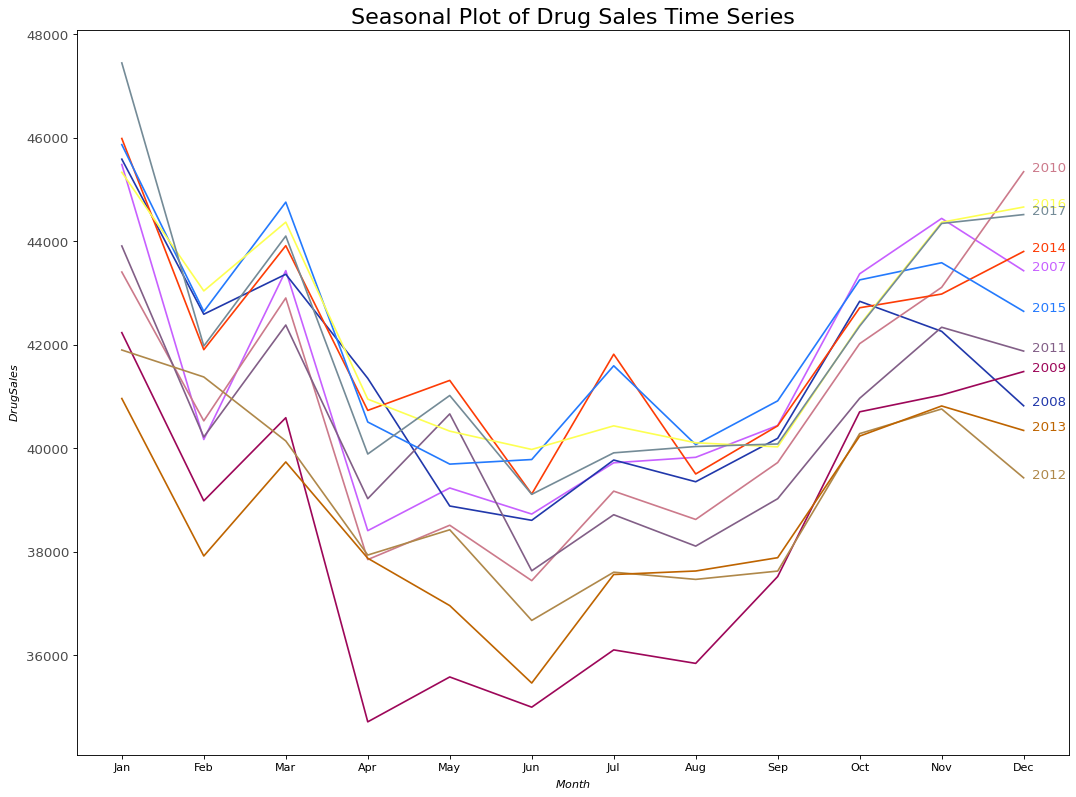

7:1: E265 block comment should start with '# '
8:1: E265 block comment should start with '# '
10:1: E265 block comment should start with '# '
17:80: E501 line too long (98 > 79 characters)
28:15: E201 whitespace after '('


In [41]:
# Prepare data
df_month["year"] = [d.year for d in df_month.date]
df_month["month"] = [d.strftime("%b") for d in df_month.date]
years = df_month["year"].unique()

# Prep Colors
#np.random.seed(100)
#mycolors = np.random.choice(
#    list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
#)

# Draw Plot
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df_month.loc[df_month.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df_month.loc[df_month.year == y, :].shape[0] - 0.9,
            df_month.loc[df_month.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

# Decoration
plt.gca().set( ylabel="$Drug Sales$", xlabel="$Month$")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [31]:
df_month['year'] = df_month['date'].dt.year
df_month['month'] = df_month['date'].dt.month
df_month['week'] = df_month['date'].dt.week

/home/wojciech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
years = df_month["year"].unique()

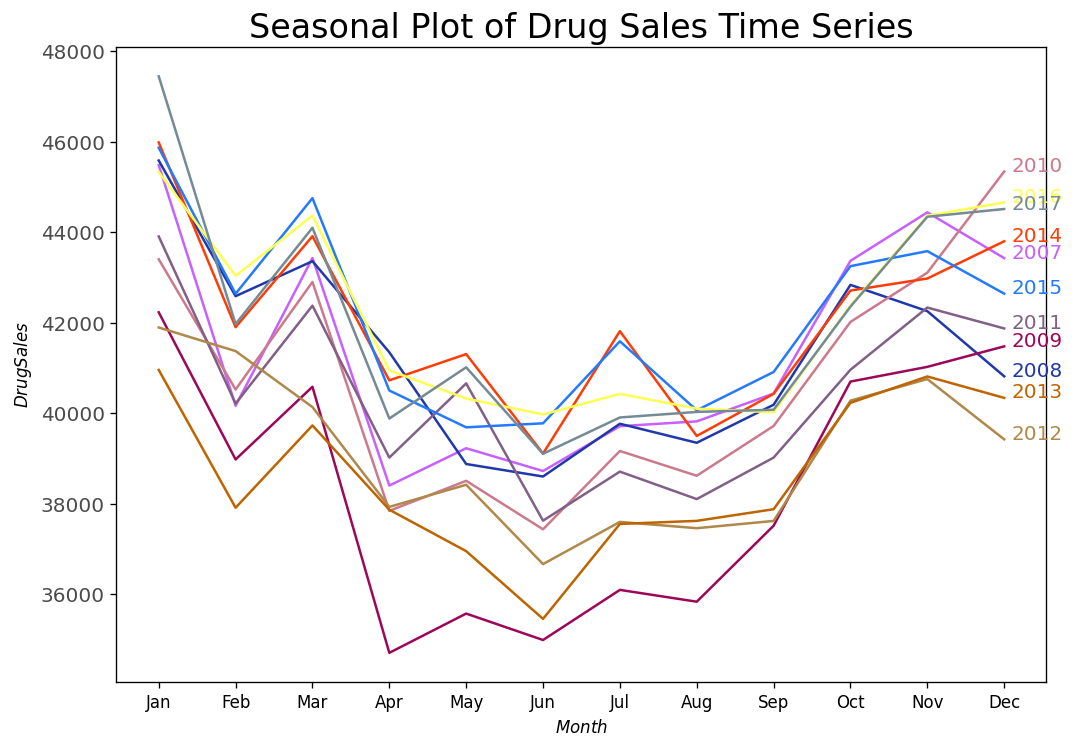

9:80: E501 line too long (98 > 79 characters)
20:15: E201 whitespace after '('


In [34]:
# Prepare data
df_month["year"] = [d.year for d in df_month.date]
df_month["month"] = [d.strftime("%b") for d in df_month.date]
years = df_month["year"].unique()

for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df_month.loc[df_month.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df_month.loc[df_month.year == y, :].shape[0] - 0.9,
            df_month.loc[df_month.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

# Decoration
plt.gca().set( ylabel="$Drug Sales$", xlabel="$Month$")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [50]:
#KOT = ['Źle', 'średnio', 'dobrze', 'super']

#foka = pd.qcut(df["Happiness Score"], 4, labels=KOT)

kot = pd.pivot_table(df_month, index= ['year'], columns='month', values= "value", aggfunc= 'mean')
kot

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2006,38251.767,38476.85200,42956.27700,41078.993,45304.704,38852.185,37253.450,43978.124,38858.143,43084.92400,41638.01900,39335.09800
2007,38403.995,39821.18500,43426.04500,40165.562,45478.799,39715.162,38724.862,43428.206,39228.516,44437.12800,43366.66200,40435.72500
2008,41347.297,39349.02800,40816.74300,42586.100,45581.578,39768.857,38603.913,43358.251,38880.021,42255.18700,42835.43800,40188.46300
2009,34710.191,35839.55400,41477.86300,38980.345,42229.924,36099.992,34993.705,40585.894,35577.173,41025.15300,40700.05500,37517.57900
2010,37845.164,38620.80200,45339.25400,40525.031,43401.292,39167.491,37438.153,42899.822,38508.824,43105.64500,42017.11600,39720.10600
2011,39021.969,38105.35300,41873.61800,40213.953,43905.008,38711.814,37628.830,42376.675,40659.857,42334.34200,40961.46200,39021.20500
2012,37932.810,37462.45400,39424.86900,41373.321,41894.678,37601.565,36669.470,40137.196,38421.050,40755.17100,40279.24100,37622.92900
2013,37870.799,37624.43200,40340.28900,37914.448,40957.043,37556.608,35459.970,39731.819,36955.814,40813.00100,40230.91300,37881.71700
2014,40727.481,39499.30000,43798.54100,41901.035,45981.101,41813.118,39111.367,43910.209,41307.212,42975.80000,42710.38500,40429.27200


1:1: E265 block comment should start with '# '
3:1: E265 block comment should start with '# '
5:38: E251 unexpected spaces around keyword / parameter equals
5:73: E251 unexpected spaces around keyword / parameter equals
5:80: E501 line too long (98 > 79 characters)
5:91: E251 unexpected spaces around keyword / parameter equals


<AxesSubplot:xlabel='year'>

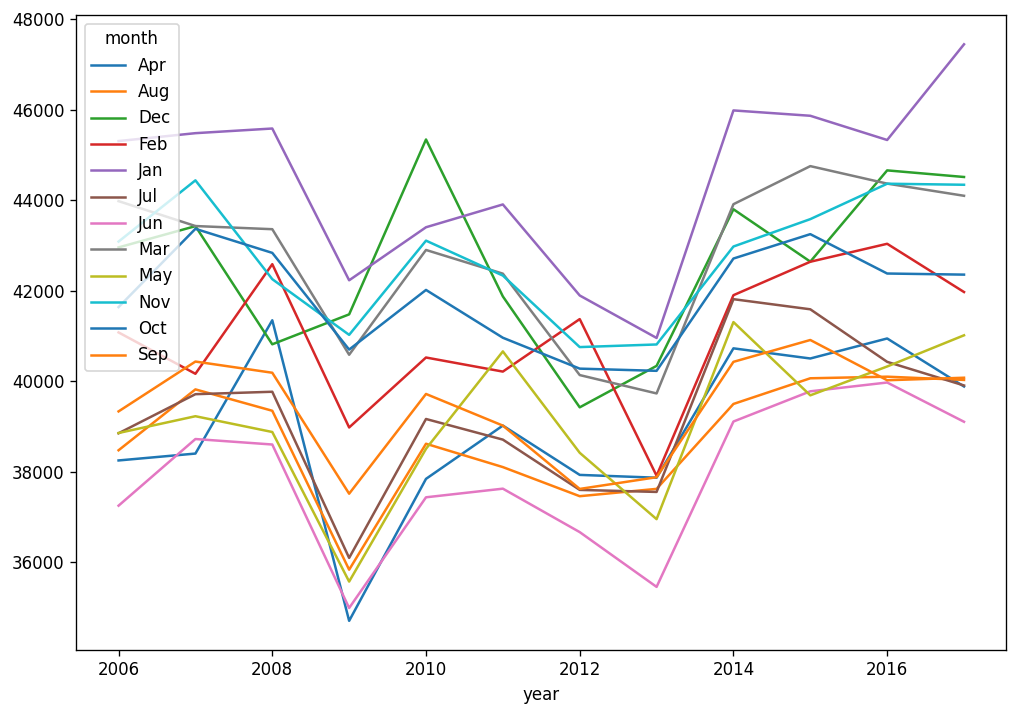

1:16: E251 unexpected spaces around keyword / parameter equals


In [52]:
kot.plot(legend =True)

In [54]:
kot2 = pd.pivot_table(df_month, index= ['month'], columns='year', values= "value", aggfunc= 'mean')
kot2

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,
Apr,38251.767,38403.995,41347.297,34710.191,37845.164,39021.969,37932.810,37870.799,40727.481,40503.252,40945.316,39884.71100
Aug,38476.852,39821.185,39349.028,35839.554,38620.802,38105.353,37462.454,37624.432,39499.300,40066.433,40101.607,40029.77368
Dec,42956.277,43426.045,40816.743,41477.863,45339.254,41873.618,39424.869,40340.289,43798.541,42641.911,44657.105,44511.10431
Feb,41078.993,40165.562,42586.100,38980.345,40525.031,40213.953,41373.321,37914.448,41901.035,42639.491,43036.149,41970.81400
Jan,45304.704,45478.799,45581.578,42229.924,43401.292,43905.008,41894.678,40957.043,45981.101,45863.011,45328.180,47441.37600
Jul,38852.185,39715.162,39768.857,36099.992,39167.491,38711.814,37601.565,37556.608,41813.118,41589.568,40429.127,39907.57800
Jun,37253.450,38724.862,38603.913,34993.705,37438.153,37628.830,36669.470,35459.970,39111.367,39778.442,39973.030,39105.83100
Mar,43978.124,43428.206,43358.251,40585.894,42899.822,42376.675,40137.196,39731.819,43910.209,44751.190,44364.804,44096.16300
May,38858.143,39228.516,38880.021,35577.173,38508.824,40659.857,38421.050,36955.814,41307.212,39689.693,40326.867,41015.51400


1:39: E251 unexpected spaces around keyword / parameter equals
1:74: E251 unexpected spaces around keyword / parameter equals
1:80: E501 line too long (99 > 79 characters)
1:92: E251 unexpected spaces around keyword / parameter equals


<AxesSubplot:xlabel='month'>

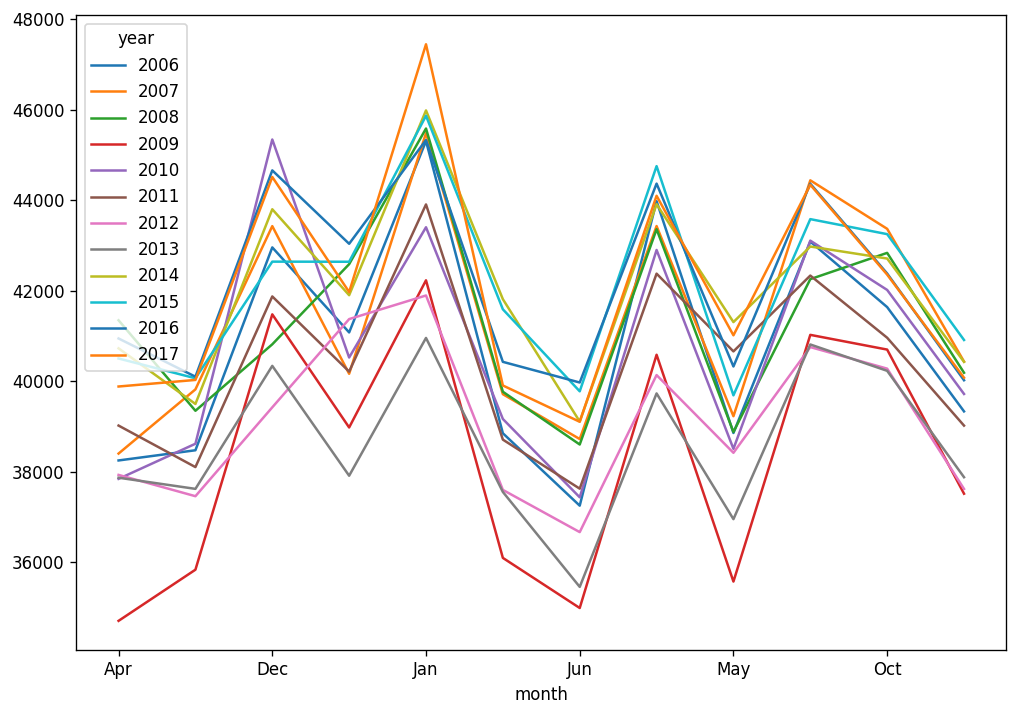

In [55]:
kot2.plot()

# WEEK

In [58]:
df = pd.read_csv(
    "/home/wojciech/Perfect-Plots__GIP/Energy.csv",
    index_col=0, parse_dates=["Date"]
)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [60]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week

/home/wojciech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
kot3 = pd.pivot_table(df, index= ['week'], columns='year', values= "Consumption", aggfunc= 'mean')
kot3

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
week,,,,,,,,,,,,
1,1381.300143,1323.127625,1288.477111,1122.246250,1405.912000,1370.802714,1233.527000,1103.339250,1257.046500,1219.086250,1429.120143,1468.473429
2,1486.730286,1483.826143,1482.137143,1366.170429,1454.283714,1429.844143,1361.100714,1322.050286,1458.074857,1459.500000,1508.874714,1544.333571
3,1490.031143,1473.298000,1486.061857,1429.244429,1408.699714,1456.100571,1397.982143,1388.535857,1508.738000,1505.723429,1564.211714,1570.934143
4,1514.176857,1514.921571,1503.636286,1393.819714,1452.648714,1481.277000,1399.240429,1402.458000,1541.613000,1543.364714,1482.912571,1571.222714
5,1501.403286,1475.830429,1483.112857,1378.845143,1461.667571,1476.771714,1461.547286,1319.079429,1546.080571,1528.625286,1474.277429,1516.592429
6,1498.217143,1471.483714,1447.476857,1414.446429,1475.495143,1412.071857,1516.870714,1353.813857,1518.917143,1553.218000,1470.200857,1537.419571
7,1446.507429,1428.536286,1458.576143,1414.740857,1436.442143,1416.529571,1410.695143,1367.142143,1504.625714,1527.346857,1504.355857,1496.527571
8,1447.651429,1400.589429,1485.451429,1391.580143,1415.685286,1451.279286,1330.148857,1348.114857,1481.738143,1504.255286,1478.600000,1477.574571
9,1439.727857,1416.508286,1471.955000,1328.327286,1461.076571,1404.315857,1335.754286,1333.157143,1460.495286,1501.108286,1478.772571,1436.945429


1:33: E251 unexpected spaces around keyword / parameter equals
1:67: E251 unexpected spaces around keyword / parameter equals
1:80: E501 line too long (98 > 79 characters)
1:91: E251 unexpected spaces around keyword / parameter equals


<AxesSubplot:xlabel='week'>

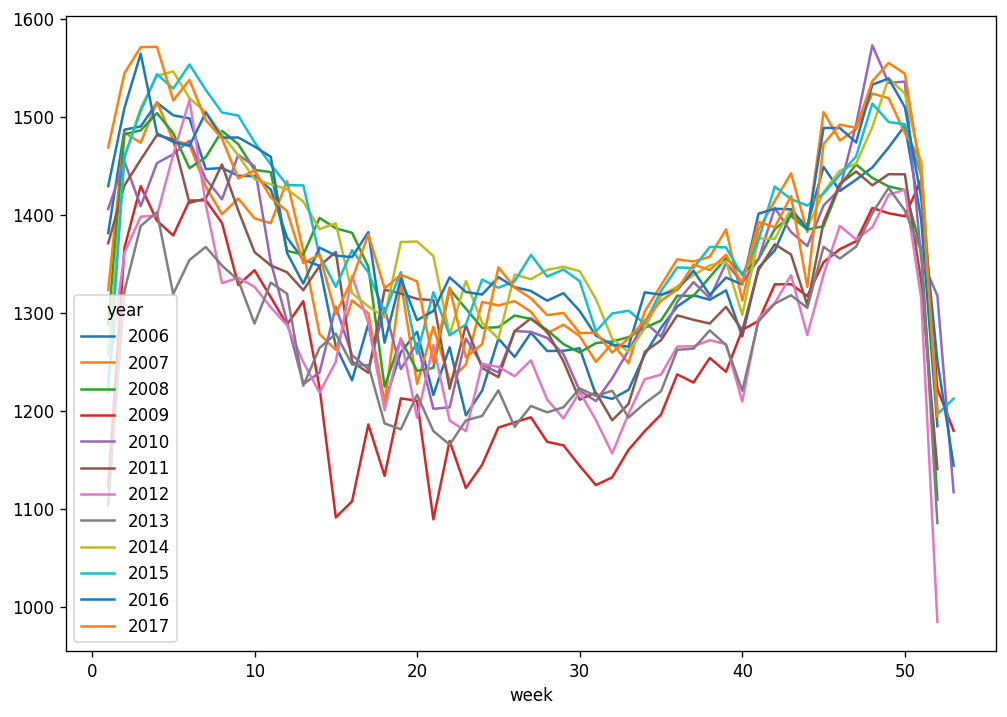

In [63]:
kot3.plot()

In [67]:
kot3 = pd.pivot_table(df, index= ['week'], columns=['year'] , values= "Consumption", aggfunc= 'mean')
kot3

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
week,,,,,,,,,,,,
1,1381.300143,1323.127625,1288.477111,1122.246250,1405.912000,1370.802714,1233.527000,1103.339250,1257.046500,1219.086250,1429.120143,1468.473429
2,1486.730286,1483.826143,1482.137143,1366.170429,1454.283714,1429.844143,1361.100714,1322.050286,1458.074857,1459.500000,1508.874714,1544.333571
3,1490.031143,1473.298000,1486.061857,1429.244429,1408.699714,1456.100571,1397.982143,1388.535857,1508.738000,1505.723429,1564.211714,1570.934143
4,1514.176857,1514.921571,1503.636286,1393.819714,1452.648714,1481.277000,1399.240429,1402.458000,1541.613000,1543.364714,1482.912571,1571.222714
5,1501.403286,1475.830429,1483.112857,1378.845143,1461.667571,1476.771714,1461.547286,1319.079429,1546.080571,1528.625286,1474.277429,1516.592429
6,1498.217143,1471.483714,1447.476857,1414.446429,1475.495143,1412.071857,1516.870714,1353.813857,1518.917143,1553.218000,1470.200857,1537.419571
7,1446.507429,1428.536286,1458.576143,1414.740857,1436.442143,1416.529571,1410.695143,1367.142143,1504.625714,1527.346857,1504.355857,1496.527571
8,1447.651429,1400.589429,1485.451429,1391.580143,1415.685286,1451.279286,1330.148857,1348.114857,1481.738143,1504.255286,1478.600000,1477.574571
9,1439.727857,1416.508286,1471.955000,1328.327286,1461.076571,1404.315857,1335.754286,1333.157143,1460.495286,1501.108286,1478.772571,1436.945429


1:33: E251 unexpected spaces around keyword / parameter equals
1:60: E203 whitespace before ','
1:70: E251 unexpected spaces around keyword / parameter equals
1:80: E501 line too long (101 > 79 characters)
1:94: E251 unexpected spaces around keyword / parameter equals
